In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the .csv data using pandas.read_csv

df = pd.read_csv('C:/Users/Saiyam/Desktop/temperatures.csv')
print("Shape = ", df.shape)
print("Temperature data:")
print(df.head())
print(df.tail())

Shape =  (45168, 6)
Temperature data:
  Produkt_Code  SDO_ID   Zeitstempel  Wert  Qualitaet_Niveau  Qualitaet_Byte
0  TT_TU_MN009    2014  201501010000   3.4                 7               6
1  TT_TU_MN009    2014  201501010100   3.1                 7               6
2  TT_TU_MN009    2014  201501010200   2.6                 7               1
3  TT_TU_MN009    2014  201501010300   2.8                 7               1
4  TT_TU_MN009    2014  201501010400   2.5                 7               1
      Produkt_Code  SDO_ID   Zeitstempel  Wert  Qualitaet_Niveau  \
45163  TT_TU_MN009    2014  202002251900   5.3                 0   
45164  TT_TU_MN009    2014  202002252000   5.5                 0   
45165  TT_TU_MN009    2014  202002252100   5.4                 0   
45166  TT_TU_MN009    2014  202002252200   3.8                 0   
45167  TT_TU_MN009    2014  202002252300   3.6                 0   

       Qualitaet_Byte  
45163               1  
45164               1  
45165              

In [3]:
#use only timestamp and temperature from the given data

df = df[['Zeitstempel', 'Wert']]
print("Modified Shape = ", df.shape)
print("Modified data frame:")
print(df.head())
print(df.tail())

Modified Shape =  (45168, 2)
Modified data frame:
    Zeitstempel  Wert
0  201501010000   3.4
1  201501010100   3.1
2  201501010200   2.6
3  201501010300   2.8
4  201501010400   2.5
        Zeitstempel  Wert
45163  202002251900   5.3
45164  202002252000   5.5
45165  202002252100   5.4
45166  202002252200   3.8
45167  202002252300   3.6


In [4]:
#Convert timestamp to YYYY-MM-DD HH:MM:SS format

df['Zeitstempel'] = pd.to_datetime(df['Zeitstempel'], format='%Y%m%d%H%M')
print(df.head())
print(df.tail())

          Zeitstempel  Wert
0 2015-01-01 00:00:00   3.4
1 2015-01-01 01:00:00   3.1
2 2015-01-01 02:00:00   2.6
3 2015-01-01 03:00:00   2.8
4 2015-01-01 04:00:00   2.5
              Zeitstempel  Wert
45163 2020-02-25 19:00:00   5.3
45164 2020-02-25 20:00:00   5.5
45165 2020-02-25 21:00:00   5.4
45166 2020-02-25 22:00:00   3.8
45167 2020-02-25 23:00:00   3.6


In [5]:
#Convert the time steps of the temperature data to 15-minutes-intervals, using linear interpolation

df = df.set_index('Zeitstempel').resample('15T').interpolate().reset_index()
print(df.shape)
print(df.head())
print(df.tail())

(180669, 2)
          Zeitstempel   Wert
0 2015-01-01 00:00:00  3.400
1 2015-01-01 00:15:00  3.325
2 2015-01-01 00:30:00  3.250
3 2015-01-01 00:45:00  3.175
4 2015-01-01 01:00:00  3.100
               Zeitstempel  Wert
180664 2020-02-25 22:00:00  3.80
180665 2020-02-25 22:15:00  3.75
180666 2020-02-25 22:30:00  3.70
180667 2020-02-25 22:45:00  3.65
180668 2020-02-25 23:00:00  3.60


In [6]:
#Find the hottest and temperature values for every year and their time of occurrence

idx = df.groupby([df['Zeitstempel'].dt.year])['Wert'].transform(max) == df['Wert']
df_hottest = df[idx].reset_index()
df_hottest['Date'] = df_hottest['Zeitstempel'].dt.date
df_hottest['Time'] = df_hottest['Zeitstempel'].dt.time
df_hottest = df_hottest.drop({'index', 'Zeitstempel'}, axis=1)
print(df_hottest)

   Wert        Date      Time
0  36.0  2015-07-04  14:00:00
1  34.0  2016-08-28  14:00:00
2  31.9  2017-06-22  11:00:00
3  35.6  2018-08-07  15:00:00
4  37.4  2019-07-25  13:00:00
5  17.7  2020-02-16  19:00:00
6  17.7  2020-02-16  19:15:00
7  17.7  2020-02-16  19:30:00
8  17.7  2020-02-16  19:45:00
9  17.7  2020-02-16  20:00:00


In [7]:
#Find the coldest temperature values for every year and their time of occurrence

idx = df.groupby([df['Zeitstempel'].dt.year])['Wert'].transform(min) == df['Wert']
df_coldest = df[idx].reset_index()
df_coldest['Date'] = df_coldest['Zeitstempel'].dt.date
df_coldest['Time'] = df_coldest['Zeitstempel'].dt.time
df_coldest = df_coldest.drop({'index', 'Zeitstempel'}, axis=1)
print(df_coldest)

   Wert        Date      Time
0  -6.6  2015-02-07  04:00:00
1 -12.0  2016-01-22  02:00:00
2 -10.5  2017-01-06  05:00:00
3 -10.5  2017-01-06  08:00:00
4 -11.8  2018-03-02  06:00:00
5  -9.0  2019-01-21  06:00:00
6  -4.6  2020-01-01  08:00:00


In [8]:
#Store the hottest and coldest temperatures in a .csv file

df_hottest.to_csv('Hottest_temperature_values.csv')
df_coldest.to_csv('Coldest_temperature_values.csv')

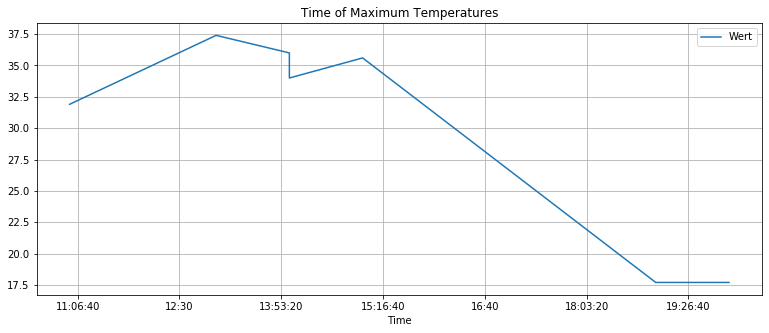

In [9]:
#Plot the temperatures for the hottest days of each provided year over time of day

hot_plot = df_hottest
hot_plot = hot_plot.drop('Date', axis=1).set_index('Time')
hot_plot.plot(figsize=(13,5), title="Time of Maximum Temperatures", grid=True)

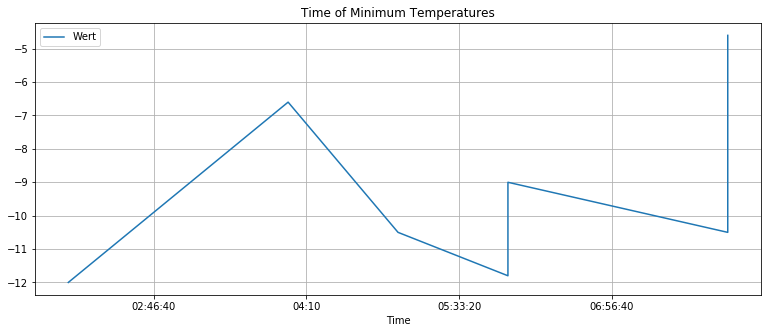

In [10]:
#Plot the temperatures for the coldest days of each provided year over time of day

cold_plot = df_coldest
cold_plot = cold_plot.drop('Date', axis=1).set_index('Time')
cold_plot.plot(figsize=(13,5), title="Time of Minimum Temperatures", grid=True)

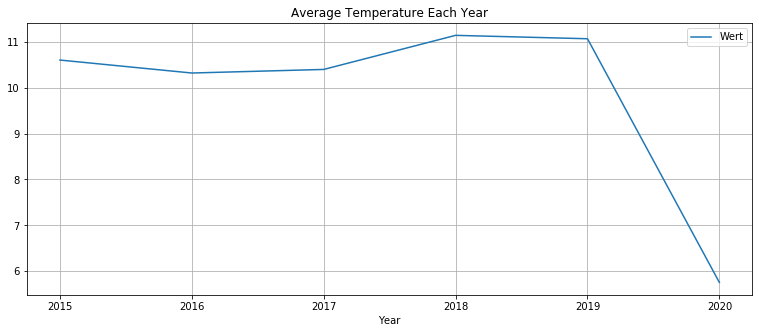

In [12]:
#Plot the average temperature throughout the year for each year
#The average temperature values of the year 2020 are very less when compared to other years

df_avg = df.groupby([df['Zeitstempel'].dt.year]).mean().reset_index()
df_avg.rename(columns={'Zeitstempel': 'Year'}, inplace=True)
df_avg.set_index('Year', inplace=True)
df_avg.plot(figsize=(13,5), title="Average Temperature Each Year", grid=True)

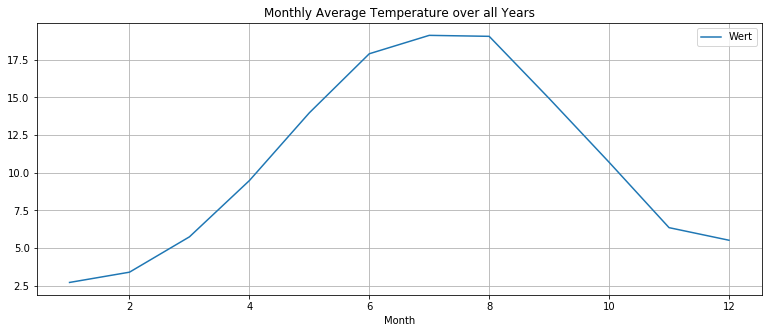

In [13]:
#Plot the monthly average temperatures averaged over all years
#This shows which months of the year are hottest and the coldest

df_month_avg = df.groupby([df['Zeitstempel'].dt.month]).mean().reset_index()
df_month_avg.rename(columns={'Zeitstempel': 'Month'}, inplace=True)
df_month_avg.set_index('Month', inplace=True)
df_month_avg.plot(figsize=(13,5), title="Monthly Average Temperature over all Years", grid=True)

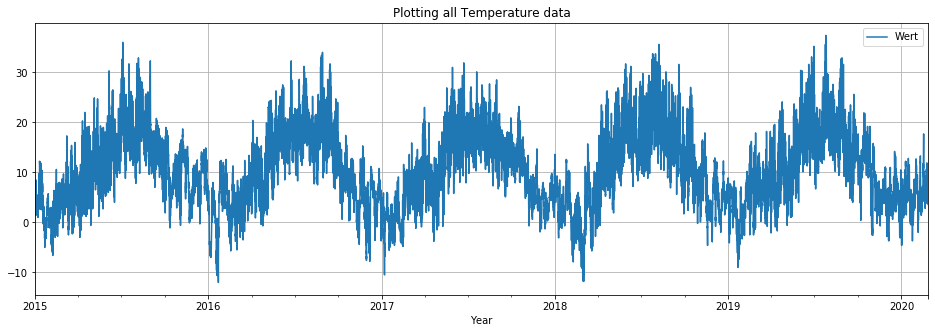

In [16]:
#Plot all the temperature values
#In this it can be seen that the temperature values of the year 2020 are incomplete, hence the average temperature values for 202 are different than other years

df_all = df.reset_index()
df_all.rename(columns={'Zeitstempel': 'Year'}, inplace=True)
df_all.set_index('Year', inplace=True)
df_all.plot(figsize=(16,5), title="Plotting all Temperature data", grid=True)